## Data Preprocessing 

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

# Scaling modules
from mlxtend.preprocessing import minmax_scaling, standardize

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


### Task 1

In [19]:
# 1. Read in store_income_task.csv
store_df = pd.read_csv('store_income_data_task.csv')
print(store_df)
store_df.shape

# 2. Display the first 5 observations
store_df.head()


       id                                         store_name  \
0       1                         Cullen/Frost Bankers, Inc.   
1       2                                Nordson Corporation   
2       3                              Stag Industrial, Inc.   
3       4                                FIRST REPUBLIC BANK   
4       5                        Mercantile Bank Corporation   
..    ...                                                ...   
995   996                        Columbia Sportswear Company   
996   997  WisdomTree Interest Rate Hedged High Yield Bon...   
997   998         Tortoise Energy Infrastructure Corporation   
998   999                                  Qwest Corporation   
999  1000                                    SLM Corporation   

              store_email   department        income date_measured  \
0                     NaN     Clothing  $54438554.24      4-2-2006   
1                     NaN        Tools  $41744177.01      4-1-2006   
2                    

,id,store_name,store_email,department,income,date_measured,country
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,$54438554.24,4-2-2006,United States/
1,2,Nordson Corporation,NaN,Tools,$41744177.01,4-1-2006,Britain
2,3,"Stag Industrial, Inc.",NaN,Beauty,$36152340.34,12-9-2003,United States
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,$8928350.04,8-5-2006,Britain/
4,5,Mercantile Bank Corporation,NaN,Baby,$33552742.32,21-1-1973,United Kingdom


In [25]:
# 3. Get the number of missing data points per column
missing_data_points = store_df.isnull().sum()

# 4. Identify the number of missing values in the first ten columns
missing_data_points[0:10]



id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           35
dtype: int64

5. A note on why there is missing data for the following three columns: store_email,  department, and country. Classifying them according to the three categories(types of missingness).



Store_email: my assumption is that store emails are missing completely at random. Store email is usually quite an easily accessible piece of information and it is very crucial for a business's customer service and other operations and opportunities. This leads me to believe that businesses do not necessarily have the intention to hide their email address. Hence, the missing data in this column could be caused by technical glitches or unproper data entry, and unrelated to other variables like country, department or date measured.

Department: my assumption is that department data can be missing not at random. For example, certain department information could be intentionally omitted due to the different legal restrictions in different countries, or due to sensitive issues and privacy concerns, suggesting that this missingness is not due to random silly mistakes.

Country: my assumption is that the country data could be missing at random. For example, the country data could be missing depending on the specific store names. Some stores could be operation across different countries, they can be MNCs and it can be hard to categorise them into one specific country, leading to the missingness of the country data.


### Task 2

1. For the following real-life scenarios, decide whether standardisation or normalisation makes more sense. 

  a. You want to build a linear regression model to predict someone's grades, given how much time they spend on various activities during a typical school week.  You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying, while others study for four or more hours daily. Should you standardise or normalise this variable?  
  
  b. You're still working with your student's grades, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you standardise or normalise these variables?
  

**Answer:**  

a. In this case, since the distribution of the data does not follow the Gaussian distribution, the best option would be to normalise the data.

b. In this case, it is unclear whether the data follows a Gaussian distribution, but judging by the nature of the data, the best option would be to standardise the data. Normalisation mainly helps eliminate the different measurements of data whereas standardisation scales the data the have a mean of 0 and a standard deviation of 1, which can be useful when the averages between jumping jacks per minute and push ups per minute are so different.

In [29]:
# 2. From the countries dataset, visualise the "EG.ELC.ACCS.ZS" column using a histogram.  
# Then, scale the column using the appropriate scaling method (normalisation or standardisaton).
# Finally, visualise the original and scaled data alongside each other. 
# Note EG.ELC.ACCS.ZS is the percentage of the population with access to electricity.
countries_df = pd.read_csv('countries.csv')
print(countries_df)



   Country                                     Country Groups  \
0      CEB                     Central Europe and the Baltics   
1      CSS                             Caribbean small states   
2      EAP        East Asia & Pacific (excluding high income)   
3      EAR                         Early-demographic dividend   
4      EAS                                East Asia & Pacific   
5      ECA      Europe & Central Asia (excluding high income)   
6      ECS                              Europe & Central Asia   
7      EMU                                          Euro area   
8      EUU                                     European Union   
9      FCS           Fragile and conflict affected situations   
10     FSM                              Micronesia, Fed. Sts.   
11     HIC                                        High income   
12     HPC             Heavily indebted poor countries (HIPC)   
13     IBD                                          IBRD only   
14     IBT               

<Axes: xlabel='EG.ELC.ACCS.ZS', ylabel='Count'>

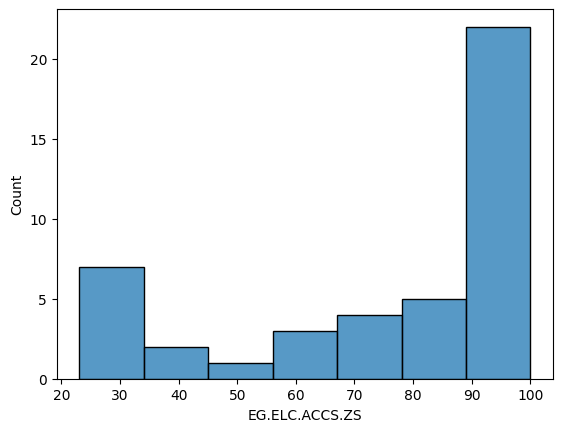

In [27]:
#visualise the "EG.ELC.ACCS.ZS" column using a histogram
sns.histplot(countries_df['EG.ELC.ACCS.ZS'])

Text(0.5, 1.0, 'Scaled data')

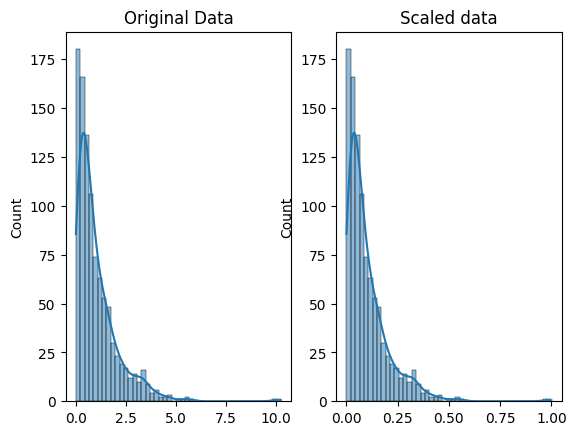

In [32]:
# As seen on the histogram above, the data in this column does not follow the normal distribution
# Therefore, I have chosen to normalise the data
# Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
# Based on the normalisation formula, which is x - min(x) / max(x) - min(x), I have defined this function below
def minmax_scaling(original_data, column):
    min_value = np.min(original_data)
    max_value = np.max(original_data)
    scaled_data = (original_data - min_value) / (max_value - min_value)
    return scaled_data

# Use minmax to normalise the data 
scaled_data = minmax_scaling(original_data, column = [3])

# Plot the orginal and scaled data to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0],kde=True)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1],kde=True)
ax[1].set_title("Scaled data")
